In [5]:
%run data_cleaning.py

In [6]:
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = df_cleaned

In [9]:
df.dtypes
numerical_columns = [col for col in df.columns if col != "Tumor Size (mm)"]

In [10]:
from sklearn.preprocessing import RobustScaler

# Apllying RobustScaler to scale orginal numerical features
df[numerical_columns] = RobustScaler().fit_transform(df[numerical_columns])
df.head()

,Age,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size (mm),Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,1.000000,-1.0,0.0,-0.5,1.0,0.0,4,0.0,0.0,1.0,-0.333333,-0.516129,0.0
1,-0.285714,0.0,1.0,0.5,0.0,0.0,35,0.0,0.0,0.0,1.000000,-0.451613,0.0
2,0.285714,1.0,2.0,1.5,0.0,0.0,63,0.0,0.0,0.0,1.666667,-0.032258,0.0
3,0.285714,-1.0,0.0,-0.5,1.0,0.0,18,0.0,0.0,-1.2,-0.333333,0.258065,0.0
4,-0.500000,0.0,0.0,0.0,1.0,0.0,41,0.0,0.0,-1.1,-0.333333,-0.838710,0.0


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #splitting data into test and train

model = LinearRegression()
X = df.drop(["Tumor Size (mm)", "T Stage", "6th Stage"], axis=1)
y = df["Tumor Size (mm)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

LinearRegression()

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
np.random.seed(42)

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", str(mse) + " ((" + str(mse**0.5) + "))")
print("r2 Score:", str(r2))

Mean Squared Error: 195.15599520038026 ((13.969824451308623))
r2 Score: 0.0917372721904679


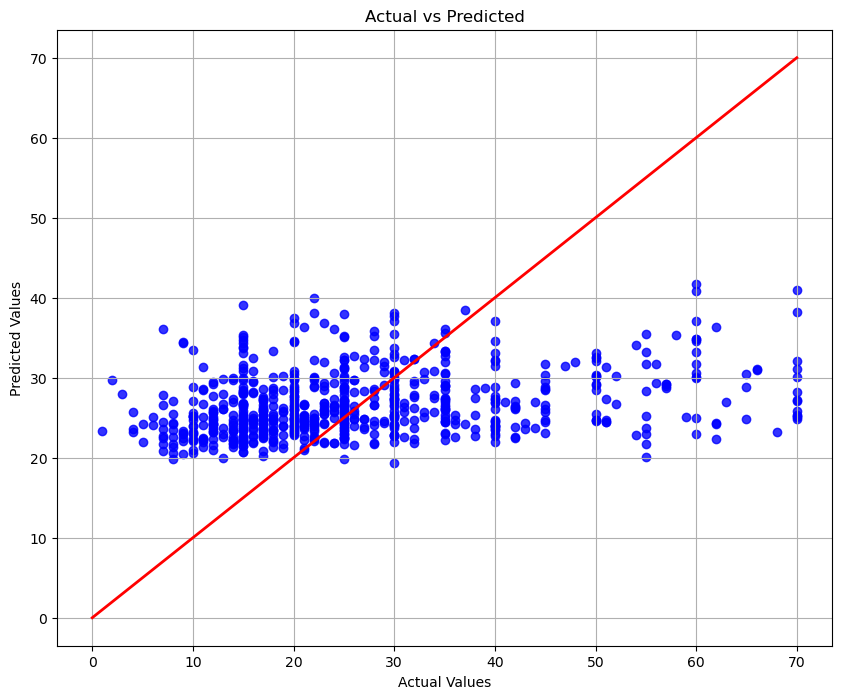

In [15]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions, color='blue', alpha=0.8)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='-', linewidth=2)
plt.show()

In [16]:
coefficients = model.coef_

# Print coefficients along with corresponding feature names
for feature, coefficient in zip(X.columns, coefficients):
    print(f"{feature}: {coefficient}")

Age: -1.7500564958786247
N Stage: 4.226287072248463
Grade: 2.1475318590025334
A Stage: -3.0385051323461916
Estrogen Status: 4.067440281576802
Progesterone Status: -2.1825629074664477
Regional Node Examined: 0.6755684940089961
Regional Node Positive: 0.12638745952441705
Survival Months: -0.6931327831509233
Status: 0.963254730347577


In [17]:
X = df[["Age", "N Stage", "A Stage", "Progesterone Status", "Regional Node Positive", "Estrogen Status"]]
y  = df["Tumor Size (mm)"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", str(mse) + " ((" + str(mse**0.5) + "))")
print("r2 Score:", str(r2))

Mean Squared Error: 198.2399048904684 ((14.079769347914347))
r2 Score: 0.07738465020433971


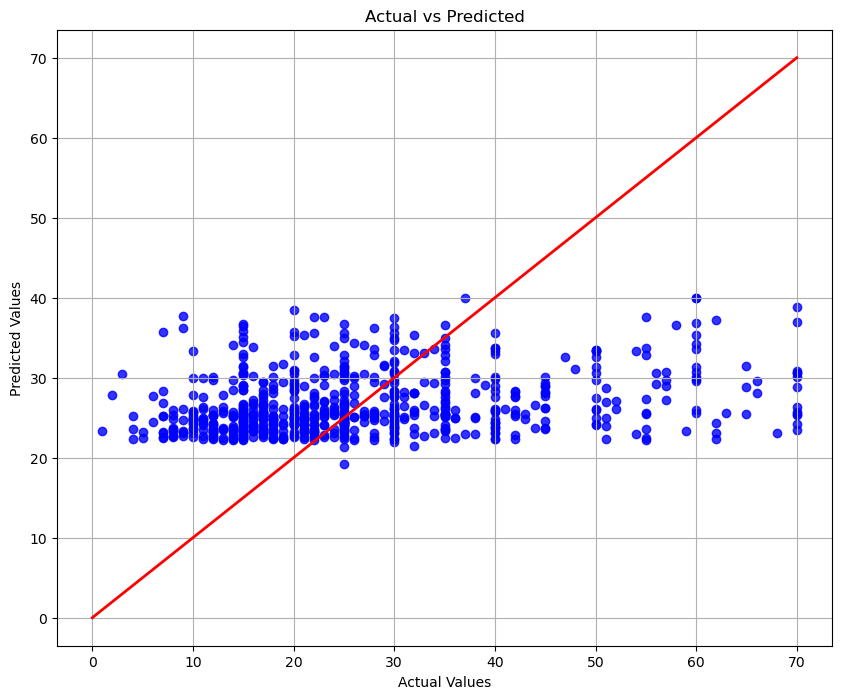

In [19]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions, color='blue', alpha=0.8)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='-', linewidth=2)
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer

In [24]:
lasso = Lasso()

scorer = make_scorer(mean_squared_error, greater_is_better=False)

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10.0]}

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring = scorer, cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_lasso = Lasso(alpha=best_alpha)

best_lasso.fit(X_train, y_train)

predictions = best_lasso.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", str(mse) + " ((" + str(mse**0.5) + "))")
print("r2 Score:", str(r2))

Mean Squared Error: 198.2426475455717 ((14.079866744595693))
r2 Score: 0.07737188579296195


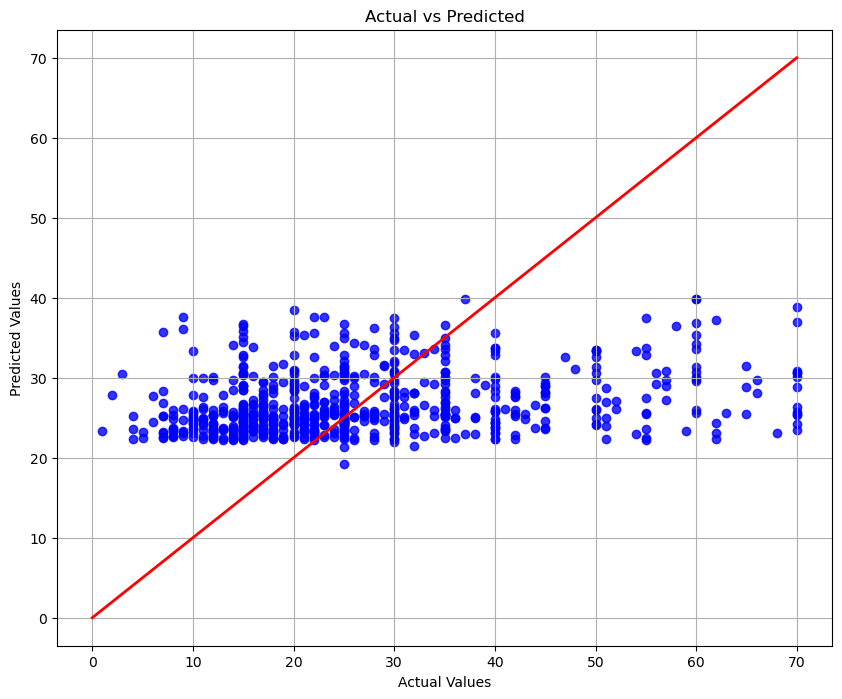

In [25]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions, color='blue', alpha=0.8)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='-', linewidth=2)
plt.show()

In [27]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10.0], 'l1_ratio': [0.1, 0.5, 0.7, 0.9]}
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']
best_elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
best_elastic_net.fit(X_train, y_train)
predictions = best_elastic_net.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", str(mse) + " ((" + str(mse**0.5) + "))")
print("r2 Score:", str(r2))

Mean Squared Error: 198.43071287555293 ((14.086543680958538))
r2 Score: 0.07649662326546558


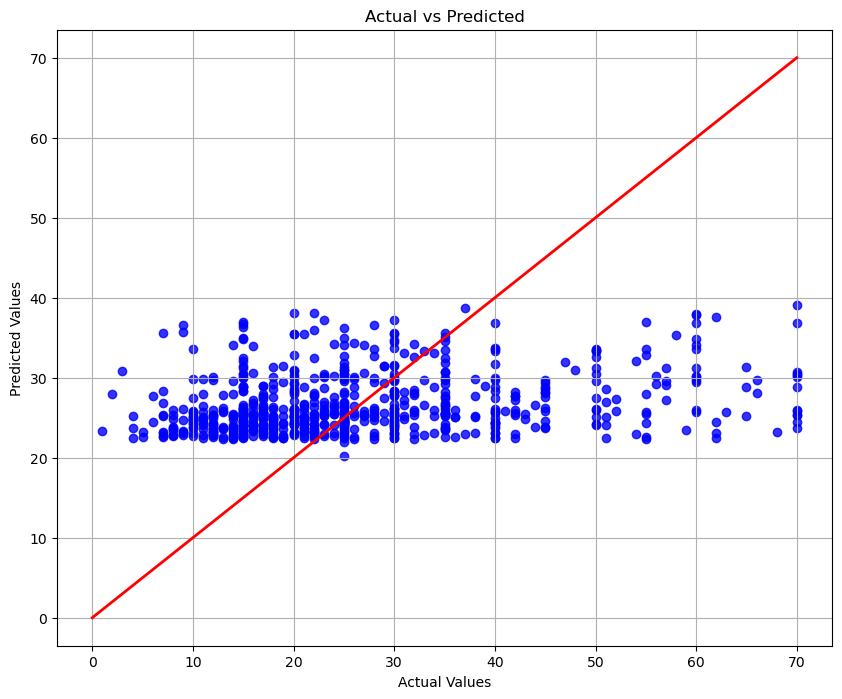

In [28]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions, color='blue', alpha=0.8)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='-', linewidth=2)
plt.show()